In [2]:
import pymysql
#连接数据库
db = pymysql.connect(host="rm-uf6ua72q394fq6v9q9o.mysql.rds.aliyuncs.com",port=3306,user="data_analyse",password="et_data_analyse",
                     database="ccnu_main_test",charset="utf8")
#使用cursor()方法创建一个游标对象
cursor = db.cursor()
#cursor=pymysql.cursors.DictCursor

#sql查询按活动浏览量降序排列
sql='''
select id,max_enroll_number,current_enroll_number
from et_activity
where 
date(enroll_start_time) between '2019-01-01' and '2019-11-30';
'''
#使用execute()方法执行SQL语句,提取前20名
with cursor:
    cursor.execute(sql)
    data = cursor.fetchmany(50)
    print(data)
    db.rollback()
    db.close()
data1=data

OperationalError: (2003, "Can't connect to MySQL server on 'rm-uf6ua72q394fq6v9q9o.mysql.rds.aliyuncs.com' ([Errno 11001] getaddrinfo failed)")

In [116]:
data.dtypes

id       int32
max      int32
cur      int32
报录比    float64
dtype: object

In [108]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
import numpy as np
import pandas as pd
data=np.array(data)

#获取最大报名数量和当前报名数量
data=pd.DataFrame(data)
data.columns=['id','max','cur']
sorted=data.sort_values(by=['max','cur'],ascending=False)
max_0=sorted[sorted['max']==0].index
for i in max_0:
    data.iloc[i]['max']=data.ix[i]['cur']

data['报录比']=np.round(data['cur']/data['max'],3)



E:\Anaconda\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  del sys.path[0]


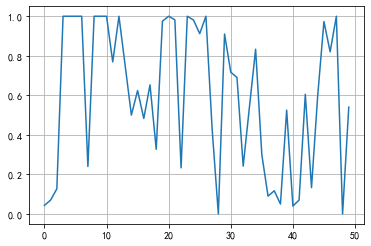

In [110]:
x=np.arange(len(data))
plt.plot(x,data['报录比'])
plt.grid(True)

In [119]:
from sklearn import linear_model
from numpy import reshape


In [133]:
linreg=linear_model.LinearRegression()
x_train=data['max'][:-20].values.reshape(-1,1)
y_train=data['报录比'][:-20].values.reshape(-1,1)
x_test=data['max'][-20:].values.reshape(-1,1)
y_test=data['报录比'][-20:].values.reshape(-1,1)
linreg.fit(x_train,y_train)
y=linreg.predict(x_test)
y.shape

(20, 1)

0.4549805510124414

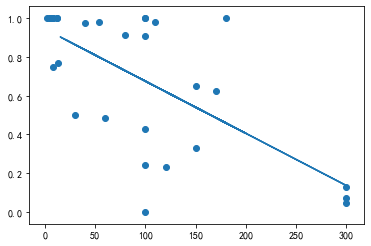

In [138]:
plt.plot(x_test,y)
plt.scatter(x_train,y_train)
linreg.score(x_train,y_train)